<center><img src="https://www.exeideas.com/wp-content/uploads/2021/07/Top-6-Effective-Airbnb-Pricing-Strategy.jpg"></center>

<b><h1><center>Linear Regression</center></h1></b>

## Context

Airbnb is an online platform that allows people to rent short-term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for accommodation and can help hosts, travelers, and also the business in devising profitable strategies. 


## Objective

To explore and visualize the data, build a linear regression model to predict the prices of Airbnb rental rooms, and generate a set of insights and recommendations that will help the business.


## Data Description

The data contains information about the different types of rental rooms offered by Airbnb over a fixed period of time. The detailed data dictionary is given below.

**Data Dictionary** 

- id: Property ID
- room_type: Type of Room in the property
- accommodates: How many adults can this property accommodate
- bathrooms: Number of bathrooms on the property
- cancellation_policy: Cancellation policy of the property
- cleaning_fee: This denotes whether the property cleaning fee is included in the rent or not
- instant_bookable: It indicates whether an instant booking facility is available or not
- review_scores_rating: Review rating score of the property
- bedrooms: Number of bedrooms in the property
- beds: Total number of beds in the property
- log_price: Log of the rental price of the property for a fixed period. [If the price is 12000 dollars, then log_price   represents log(12000)]

## Understanding the structure of the data

### Importing necessary libraries

In [811]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [812]:
# loading the dataset
data = pd.read_csv("AirBNB.csv")

<IPython.core.display.Javascript object>

In [813]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 74111 rows and 11 columns.


<IPython.core.display.Javascript object>

In [814]:
# Sample of the data
data.sample(n=10, random_state=1)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
56850,13586614,Entire home/apt,5.0,2.0,strict,False,f,100.0,2.0,3.0,7.408531
68140,18222981,Private room,3.0,1.0,strict,True,f,95.0,1.0,2.0,4.605170
23189,13915528,Entire home/apt,2.0,1.0,strict,True,f,95.0,1.0,2.0,4.094345
47255,7122067,Private room,1.0,1.0,flexible,False,f,100.0,1.0,1.0,4.317488
45933,12384924,Entire home/apt,5.0,2.0,strict,True,f,95.0,2.0,3.0,5.433722
66955,3999628,Private room,2.0,1.0,moderate,True,f,98.0,1.0,1.0,5.010635
18553,4948442,Entire home/apt,1.0,1.0,strict,False,f,NaN,0.0,1.0,5.010635
26117,666837,Shared room,16.0,2.0,flexible,False,f,76.0,1.0,1.0,2.708050
65737,15929932,Entire home/apt,10.0,1.0,strict,False,f,93.0,2.0,2.0,4.976734
8915,21173263,Entire home/apt,3.0,1.0,strict,True,f,95.0,0.0,2.0,4.700480


<IPython.core.display.Javascript object>

**Observations**

- `id` is just an index for the data entry and will add no value to our analysis. So, we will drop it.

- `room_type` contains different types and we need to look for unique values and the corresponding counts. 

- `accomadation`, `bathrooms`, `beds` and `bedrooms` columns will also need some processing before we are able to explore them. 

In [815]:
# checking for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [816]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [817]:
# Dropping the id column as it does not add any value to the analysis
df.drop("id", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [818]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


<IPython.core.display.Javascript object>

In [819]:
# checking missing values
df.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [820]:
df["accommodates"].value_counts()

2.0     31853
4.0     12066
1.0      9434
3.0      7793
6.0      4968
5.0      3444
8.0      1795
7.0       946
10.0      701
16.0      301
9.0       270
12.0      264
14.0      104
11.0       79
15.0       54
13.0       36
Name: accommodates, dtype: int64

<IPython.core.display.Javascript object>

In [821]:
df["bedrooms"].value_counts()

1.0     49783
2.0     11351
0.0      6715
3.0      4309
4.0      1330
5.0       355
6.0       106
7.0        38
8.0        14
10.0       10
9.0         8
Name: bedrooms, dtype: int64

<IPython.core.display.Javascript object>

In [822]:
df["beds"].value_counts()

1.0     45144
2.0     16704
3.0      6442
4.0      3065
5.0      1287
6.0       661
7.0       216
8.0       186
10.0       88
9.0        72
16.0       38
12.0       29
11.0       23
13.0       10
15.0        6
14.0        4
0.0         4
18.0        1
Name: beds, dtype: int64

<IPython.core.display.Javascript object>

In [823]:
df["bathrooms"].value_counts()

1.0    58096
2.0     7936
1.5     3801
2.5     1567
3.0     1066
3.5      429
4.0      286
0.5      209
0.0      198
4.5      116
5.0       72
8.0       41
5.5       39
6.0       24
6.5       12
7.0       10
7.5        6
Name: bathrooms, dtype: int64

<IPython.core.display.Javascript object>

In [824]:
df.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

* Above columns looks like having continuous values and seems like the outliers are valid.
* But we will validate it later in detail
* Other than NaN, we do have some "0" which is not a meaningful value.
* There are some object and some float variables
* Beds, Bedrooms, accommodates can be an integer too as the decimal values are meaningless for this features 

## Data Preprocessing

**Let's check the statistical summary of the numerical variables.**

In [825]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.155125,2.153603,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.235272,0.582054,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.067365,7.836556,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.265797,0.852149,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.710868,1.254142,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.782069,0.717394,0.0,4.317488,4.70953,5.220356,7.600402


<IPython.core.display.Javascript object>

**Observations**

* `room_type`, `cancellation_policy`, `cleaning_fee` and `instant_bookable` are objects and the top frequent items, counts are known from the statistical summary.

- `review_scores_rating`, `log_price` are decimal values and Mean, Median values are almost nearby.

- `accomadation`, `bathrooms`, `beds` and `bedrooms` columns also numeric and maxiumum values are very high than 3rd quartile. 

In [826]:
# filtering non-numeric columns
cat_columns = df.select_dtypes(exclude=np.number).columns
cat_columns

Index(['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable'], dtype='object')

<IPython.core.display.Javascript object>

In [827]:
# printing the number of occurrences of each unique value in each categorical column
for column in cat_columns:
    print(data[column].value_counts())
    print("-" * 50)

Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64
--------------------------------------------------
strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64
--------------------------------------------------
True     54399
False    19708
Name: cleaning_fee, dtype: int64
--------------------------------------------------
f    54660
t    19451
Name: instant_bookable, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

**Observations**

1. Looks like all the objects values are almost equally distributed
2. There are only 2 or 3 different values in each features. 

### Feature Engineering

In [828]:
# checking extreme values in bedrooms
df.sort_values(by=["bedrooms"], ascending=False).head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
19213,Entire home/apt,16.0,8.0,strict,True,f,NaN,10.0,16.0,6.684612
20098,Entire home/apt,16.0,5.0,strict,True,f,95.0,10.0,16.0,5.700444
68070,Entire home/apt,16.0,7.0,strict,False,t,100.0,10.0,16.0,6.388561
62442,Entire home/apt,16.0,4.0,flexible,False,t,NaN,10.0,16.0,6.257668
33147,Entire home/apt,16.0,7.0,flexible,False,f,NaN,10.0,16.0,7.170120


<IPython.core.display.Javascript object>

In [829]:
# checking extreme values in beds
df.sort_values(by=["beds"], ascending=False).head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
65163,Entire home/apt,16.0,5.0,strict,True,t,95.0,8.0,18.0,6.684612
20098,Entire home/apt,16.0,5.0,strict,True,f,95.0,10.0,16.0,5.700444
58569,Entire home/apt,16.0,3.0,strict,True,f,83.0,9.0,16.0,5.703782
53730,Shared room,16.0,0.0,strict,False,f,73.0,1.0,16.0,3.891820
27906,Entire home/apt,16.0,2.0,strict,True,f,NaN,6.0,16.0,6.037871


<IPython.core.display.Javascript object>

In [830]:
df[df.bedrooms > df.beds]

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
58,Private room,2.0,1.0,strict,True,f,100.0,3.0,1.0,3.688879
105,Entire home/apt,6.0,2.0,strict,True,f,99.0,3.0,2.0,6.551080
142,Entire home/apt,3.0,1.0,flexible,False,f,70.0,2.0,1.0,4.700480
329,Entire home/apt,5.0,2.0,strict,True,f,NaN,2.0,1.0,5.273000
405,Private room,2.0,1.5,moderate,False,f,NaN,4.0,1.0,4.356709
...,...,...,...,...,...,...,...,...,...,...
73747,Entire home/apt,5.0,1.0,moderate,True,f,NaN,3.0,2.0,5.010635
73748,Entire home/apt,3.0,1.0,moderate,True,f,NaN,2.0,1.0,4.787492
73816,Entire home/apt,2.0,2.0,strict,False,f,100.0,2.0,1.0,5.752573
73877,Entire home/apt,2.0,1.0,strict,False,f,100.0,2.0,1.0,4.553877


<IPython.core.display.Javascript object>

### Checking the relationship between category variables 

In [831]:
df.value_counts(subset=["room_type", "cancellation_policy"])

room_type        cancellation_policy
Entire home/apt  strict                 20954
Private room     flexible               11803
                 strict                 10729
Entire home/apt  moderate               10566
                 flexible                9782
Private room     moderate                8101
Shared room      flexible                 957
                 strict                   815
                 moderate                 391
dtype: int64

<IPython.core.display.Javascript object>

In [832]:
df.value_counts(subset=["room_type", "cancellation_policy", "cleaning_fee"])

room_type        cancellation_policy  cleaning_fee
Entire home/apt  strict               True            18971
                 moderate             True             9064
Private room     strict               True             8400
                 flexible             False            6649
                 moderate             True             5978
Entire home/apt  flexible             True             5698
Private room     flexible             True             5154
Entire home/apt  flexible             False            4084
Private room     strict               False            2329
                 moderate             False            2123
Entire home/apt  strict               False            1983
                 moderate             False            1502
Shared room      flexible             False             602
                 strict               True              532
                 flexible             True              355
                 strict               False      

<IPython.core.display.Javascript object>

In [833]:
df.groupby(["room_type", "cancellation_policy"], as_index=False)[
    "accommodates"
].median()

,room_type,cancellation_policy,accommodates
0,Entire home/apt,flexible,3.0
1,Entire home/apt,moderate,4.0
2,Entire home/apt,strict,4.0
3,Private room,flexible,2.0
4,Private room,moderate,2.0
5,Private room,strict,2.0
6,Shared room,flexible,1.0
7,Shared room,moderate,2.0
8,Shared room,strict,1.0


<IPython.core.display.Javascript object>

In [834]:
df.groupby(["room_type", "cancellation_policy"], as_index=False)["bathrooms"].median()

,room_type,cancellation_policy,bathrooms
0,Entire home/apt,flexible,1.0
1,Entire home/apt,moderate,1.0
2,Entire home/apt,strict,1.0
3,Private room,flexible,1.0
4,Private room,moderate,1.0
5,Private room,strict,1.0
6,Shared room,flexible,1.0
7,Shared room,moderate,1.0
8,Shared room,strict,1.0


<IPython.core.display.Javascript object>

In [835]:
df.groupby(["room_type", "cancellation_policy"], as_index=False)["beds"].median()

,room_type,cancellation_policy,beds
0,Entire home/apt,flexible,1.0
1,Entire home/apt,moderate,2.0
2,Entire home/apt,strict,2.0
3,Private room,flexible,1.0
4,Private room,moderate,1.0
5,Private room,strict,1.0
6,Shared room,flexible,1.0
7,Shared room,moderate,1.0
8,Shared room,strict,1.0


<IPython.core.display.Javascript object>

In [836]:
df.groupby(["room_type", "cancellation_policy"], as_index=False)["bedrooms"].median()

,room_type,cancellation_policy,bedrooms
0,Entire home/apt,flexible,1.0
1,Entire home/apt,moderate,1.0
2,Entire home/apt,strict,1.0
3,Private room,flexible,1.0
4,Private room,moderate,1.0
5,Private room,strict,1.0
6,Shared room,flexible,1.0
7,Shared room,moderate,1.0
8,Shared room,strict,1.0


<IPython.core.display.Javascript object>

In [837]:
df.groupby(["room_type", "cancellation_policy"], as_index=False)[
    "review_scores_rating"
].median()

,room_type,cancellation_policy,review_scores_rating
0,Entire home/apt,flexible,98.0
1,Entire home/apt,moderate,97.0
2,Entire home/apt,strict,96.0
3,Private room,flexible,97.0
4,Private room,moderate,97.0
5,Private room,strict,95.0
6,Shared room,flexible,96.0
7,Shared room,moderate,96.0
8,Shared room,strict,93.0


<IPython.core.display.Javascript object>

In [838]:
df.groupby(["room_type", "cancellation_policy"], as_index=False)[
    "review_scores_rating"
].mean()

,room_type,cancellation_policy,review_scores_rating
0,Entire home/apt,flexible,94.327586
1,Entire home/apt,moderate,95.016237
2,Entire home/apt,strict,93.931229
3,Private room,flexible,93.711584
4,Private room,moderate,94.639510
5,Private room,strict,93.394941
6,Shared room,flexible,92.027426
7,Shared room,moderate,93.611465
8,Shared room,strict,90.925191


<IPython.core.display.Javascript object>

**Observation**

* All the numeric values are having reasonable median values to replace the NaN

* Since the variables room_type and cancellation_policy are important and almost having equal values, using the groupby median is a better option

Text(0.5, 1.0, 'Price Distribution Plot')

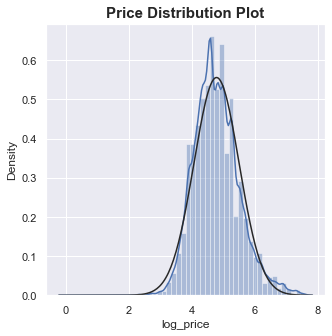

<IPython.core.display.Javascript object>

In [839]:
# Illustrate the distribution of the y variable, which is highly skewed
from scipy.stats import norm

plt.figure(figsize=(5, 5))
sns.distplot(df["log_price"], fit=norm)
plt.title("Price Distribution Plot", size=15, weight="bold")

Text(0.5, 1.0, 'Room Type vs Price vs cancellation_policy')

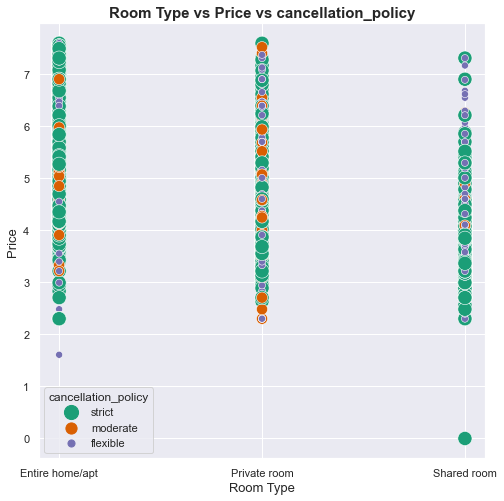

<IPython.core.display.Javascript object>

In [840]:
# Look at the Room Type vs Price vs cancellation_policy
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x="room_type",
    y="log_price",
    hue="cancellation_policy",
    size="cancellation_policy",
    sizes=(50, 200),
    palette="Dark2",
    data=df,
)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs cancellation_policy", size=15, weight="bold")

<AxesSubplot:title={'center':'log_price'}, xlabel='room_type'>

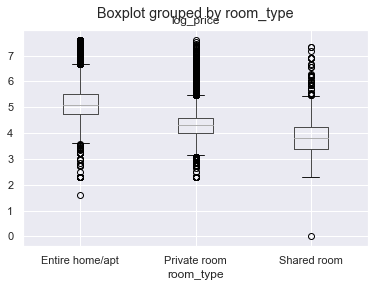

<IPython.core.display.Javascript object>

In [841]:
# Compare price_log and neighbourhood, again illustrating Manhattan is most expensive
df.boxplot(column="log_price", by="room_type")

**Observation**

* log_price variable values are normally distributed.

* Cancellation policies are strict in many room types and shared room has very less moderate policies. 

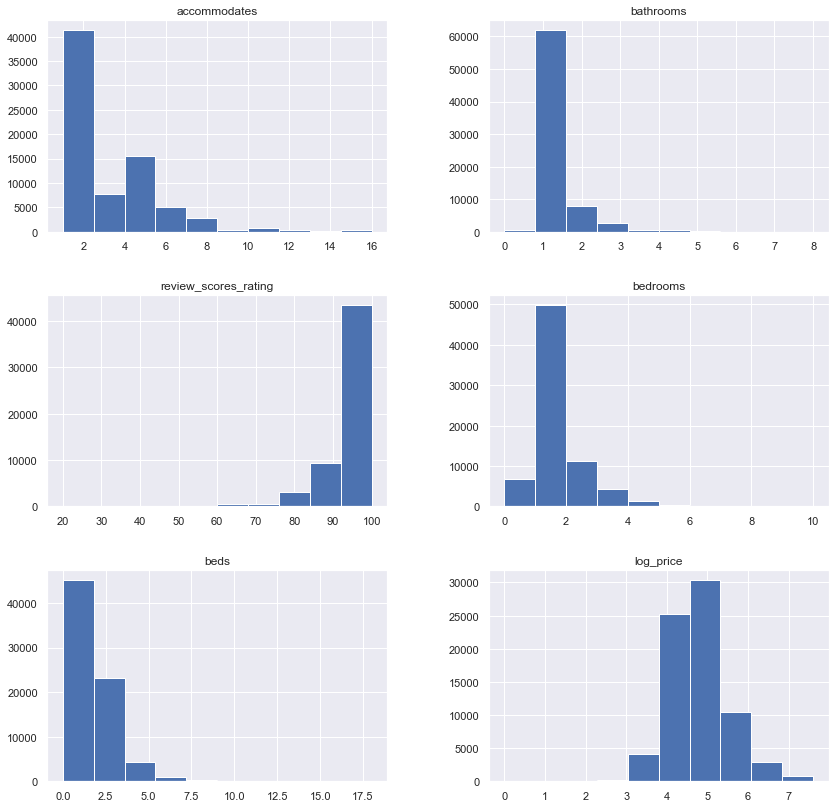

<IPython.core.display.Javascript object>

In [842]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

**Observation**

* review_scores_rating variable is left skewed and log_price almost distributed normally. 

* All the other variables are right skewed and having very high number of values in left most. 

In [843]:
# Defining the function for creating boxplot and hisogram
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple"
        )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

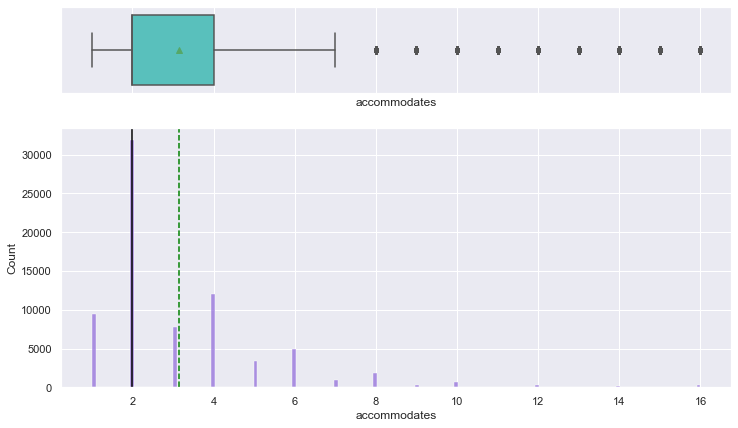

<IPython.core.display.Javascript object>

In [844]:
histogram_boxplot(df, "accommodates")

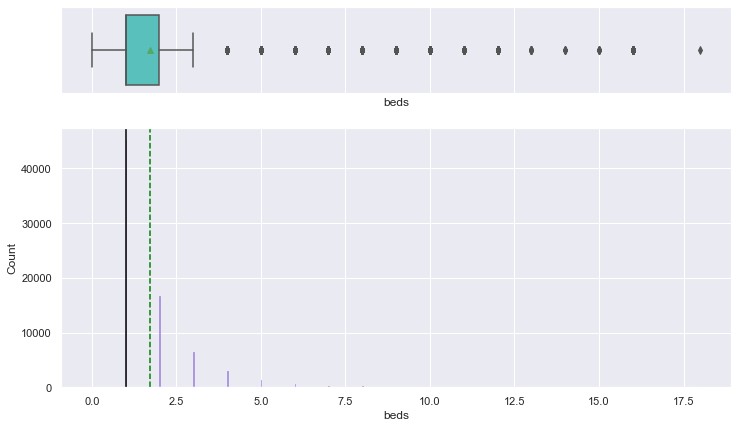

<IPython.core.display.Javascript object>

In [845]:
histogram_boxplot(df, "beds")

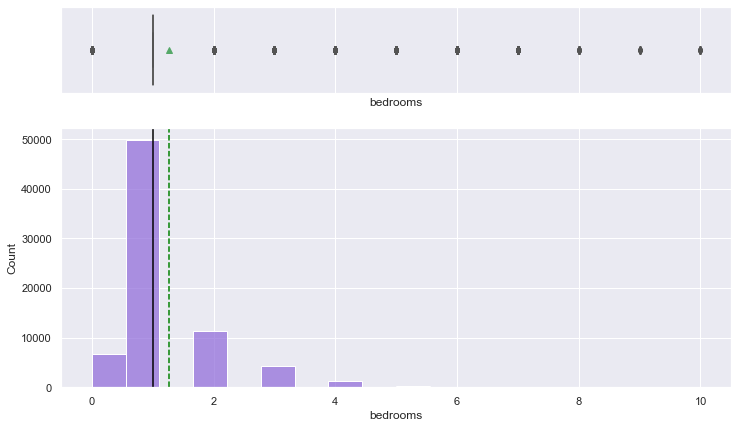

<IPython.core.display.Javascript object>

In [846]:
histogram_boxplot(df, "bedrooms")

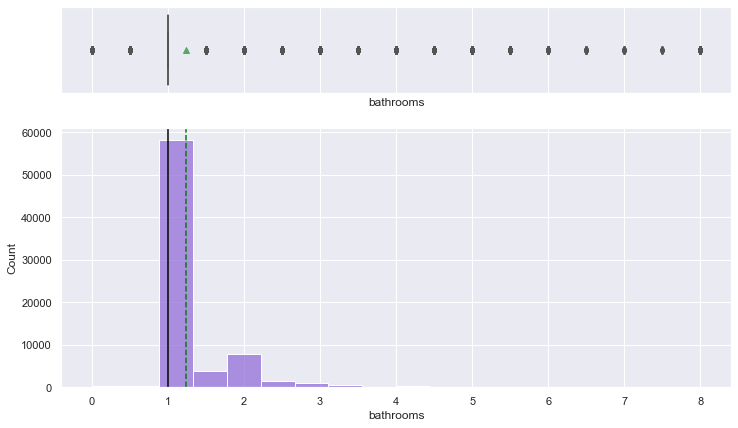

<IPython.core.display.Javascript object>

In [847]:
histogram_boxplot(df, "bathrooms")

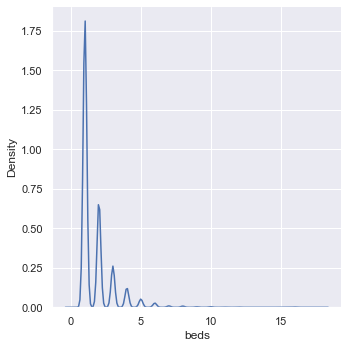

<IPython.core.display.Javascript object>

In [848]:
sns.displot(data=df, x="beds", kind="kde")
plt.show()

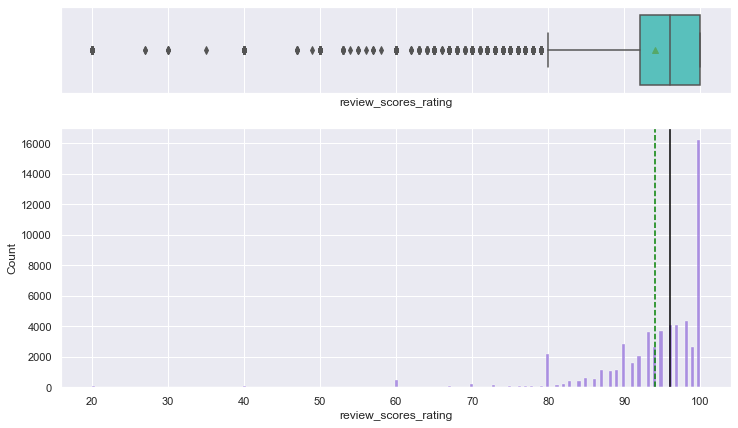

<IPython.core.display.Javascript object>

In [849]:
histogram_boxplot(df, "review_scores_rating")

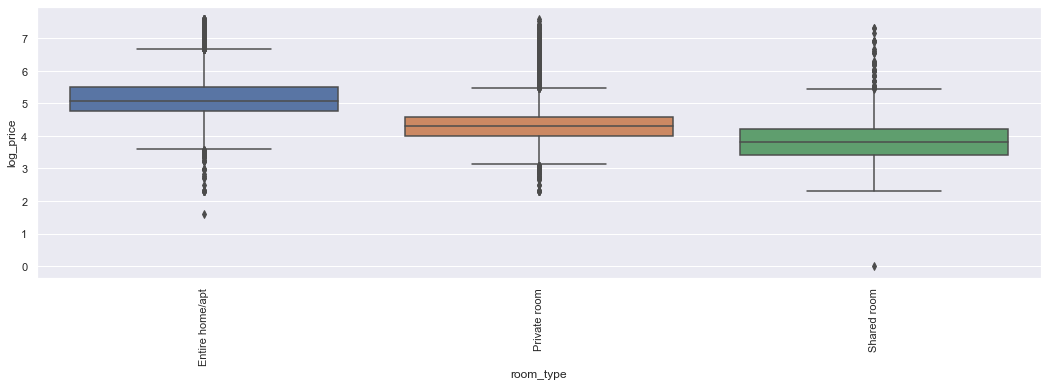

<IPython.core.display.Javascript object>

In [850]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="room_type", y="log_price", data=df)
plt.xticks(rotation=90)
plt.show()

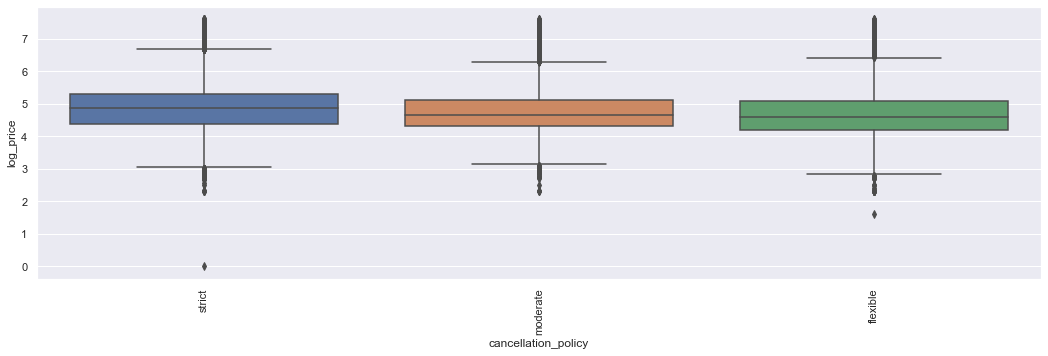

<IPython.core.display.Javascript object>

In [851]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="cancellation_policy", y="log_price", data=df)
plt.xticks(rotation=90)
plt.show()

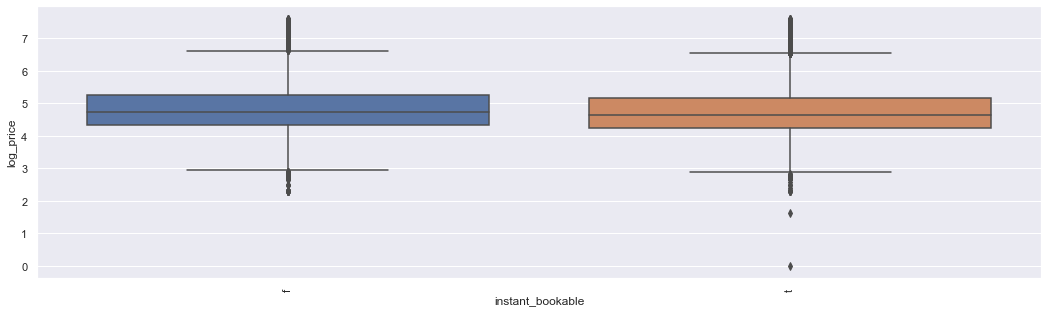

<IPython.core.display.Javascript object>

In [852]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="instant_bookable", y="log_price", data=df)
plt.xticks(rotation=90)
plt.show()

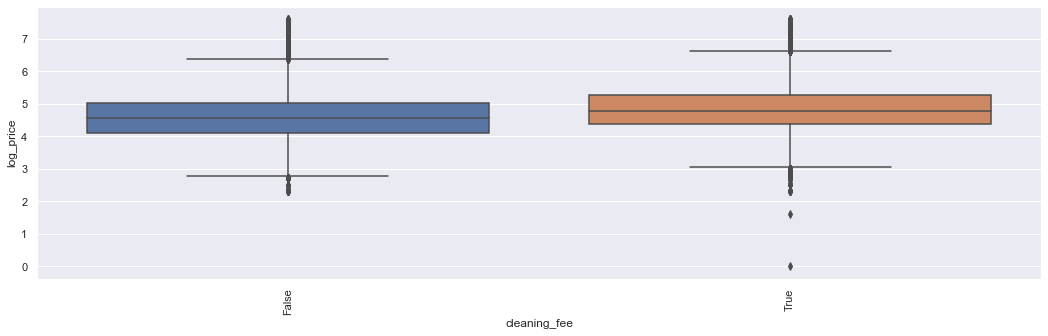

<IPython.core.display.Javascript object>

In [853]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="cleaning_fee", y="log_price", data=df)
plt.xticks(rotation=90)
plt.show()

**Observations**

- `room_type` impacts the price very much. Entire home/apt is expensive than the private, shared rooms.

- `cancellation policy`, `instant booking` or  `cleaning fee` are not impacting the prices much. 

## Missing values treatment

In [854]:
df.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [855]:
df[df["room_type"].isnull()]

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
141,NaN,1.0,1.0,flexible,False,f,NaN,1.0,1.0,5.521461
167,NaN,5.0,1.0,strict,True,f,97.0,2.0,3.0,5.575949
195,NaN,2.0,1.0,moderate,True,f,99.0,1.0,1.0,3.555348
255,NaN,4.0,1.0,moderate,True,f,91.0,1.0,2.0,4.418841
552,NaN,1.0,2.5,strict,True,t,100.0,1.0,1.0,4.488636


<IPython.core.display.Javascript object>

In [856]:
# We will drop the missing values in room_type column as it is important variable and only less rows are missing.
df.dropna(subset=["room_type"], inplace=True)

<IPython.core.display.Javascript object>

In [857]:
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [858]:
# We will drop the missing values in cancellation policy as all the values are equally present
df.dropna(subset=["cancellation_policy"], inplace=True)

<IPython.core.display.Javascript object>

In [859]:
# We will drop the missing values in room_type column as it is important variable and only less rows are missing.
df.dropna(subset=["cancellation_policy"], inplace=True)

<IPython.core.display.Javascript object>

**Observations**

- `room_type` is a very important feature and it has only 5 missing values. So, the rows can be dropped. 

- `cancellation_policy` also has only 8 missing value records and the values are almost equally distributed. So replacing the missing values with maximum occurance is not a good idea. So, this rows can also be dropped. 

In [860]:
df.isnull().sum()

room_type                   0
accommodates                0
bathrooms                 200
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    16718
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [861]:
df.groupby(["room_type", "cancellation_policy"], as_index=False)["bathrooms"].median()

,room_type,cancellation_policy,bathrooms
0,Entire home/apt,flexible,1.0
1,Entire home/apt,moderate,1.0
2,Entire home/apt,strict,1.0
3,Private room,flexible,1.0
4,Private room,moderate,1.0
5,Private room,strict,1.0
6,Shared room,flexible,1.0
7,Shared room,moderate,1.0
8,Shared room,strict,1.0


<IPython.core.display.Javascript object>

In [862]:
df["bathrooms"] = df.groupby(["room_type", "cancellation_policy"])[
    "bathrooms"
].transform(lambda x: x.fillna(x.median()))

<IPython.core.display.Javascript object>

In [863]:
df.isnull().sum()

room_type                   0
accommodates                0
bathrooms                   0
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    16718
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [864]:
df.groupby(["room_type", "cancellation_policy"], as_index=False)["bedrooms"].median()

,room_type,cancellation_policy,bedrooms
0,Entire home/apt,flexible,1.0
1,Entire home/apt,moderate,1.0
2,Entire home/apt,strict,1.0
3,Private room,flexible,1.0
4,Private room,moderate,1.0
5,Private room,strict,1.0
6,Shared room,flexible,1.0
7,Shared room,moderate,1.0
8,Shared room,strict,1.0


<IPython.core.display.Javascript object>

In [865]:
df["bedrooms"] = df.groupby(["room_type", "cancellation_policy"])["bedrooms"].transform(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

In [866]:
df.isnull().sum()

room_type                   0
accommodates                0
bathrooms                   0
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    16718
bedrooms                    0
beds                      131
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [867]:
df.groupby(["room_type", "cancellation_policy"], as_index=False)["beds"].median()

,room_type,cancellation_policy,beds
0,Entire home/apt,flexible,1.0
1,Entire home/apt,moderate,2.0
2,Entire home/apt,strict,2.0
3,Private room,flexible,1.0
4,Private room,moderate,1.0
5,Private room,strict,1.0
6,Shared room,flexible,1.0
7,Shared room,moderate,1.0
8,Shared room,strict,1.0


<IPython.core.display.Javascript object>

In [868]:
df["beds"] = df.groupby(["room_type", "cancellation_policy"])["beds"].transform(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

In [869]:
df.isnull().sum()

room_type                   0
accommodates                0
bathrooms                   0
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    16718
bedrooms                    0
beds                        0
log_price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [870]:
df["review_scores_rating"] = df.groupby(
    ["room_type", "cancellation_policy", "cleaning_fee", "instant_bookable"]
)["review_scores_rating"].transform(lambda x: x.fillna(x.mean()))

<IPython.core.display.Javascript object>

In [871]:
df.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

- `room_type and cancellation_policy` are grouped to find the median value to replace the missing values of `bathrooms, bedrooms and beds`. 

- Since `review_scores_rating` value depends on all the category variables, the missing values are replaced by the grouped `mean` values. 

In [872]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74098 entries, 0 to 74105
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74098 non-null  object 
 1   accommodates          74098 non-null  float64
 2   bathrooms             74098 non-null  float64
 3   cancellation_policy   74098 non-null  object 
 4   cleaning_fee          74098 non-null  object 
 5   instant_bookable      74098 non-null  object 
 6   review_scores_rating  74098 non-null  float64
 7   bedrooms              74098 non-null  float64
 8   beds                  74098 non-null  float64
 9   log_price             74098 non-null  float64
dtypes: float64(6), object(4)
memory usage: 6.2+ MB


<IPython.core.display.Javascript object>

#### In the below steps the features beds, bedrooms & accommodates are converted to int type as the decimal values are not possible. Also, the '0' values are replaced by the median() values. 

In [873]:
# converting 'Weight' from float to int
df["beds"] = df["beds"].astype(int)

<IPython.core.display.Javascript object>

In [874]:
# converting 'Weight' from float to int
df["bedrooms"] = df["bedrooms"].astype(int)

<IPython.core.display.Javascript object>

In [875]:
# converting 'Weight' from float to int
df["accommodates"] = df["accommodates"].astype(int)

<IPython.core.display.Javascript object>

In [876]:
df["bedrooms"].value_counts()

1     49865
2     11350
0      6713
3      4309
4      1330
5       355
6       106
7        38
8        14
10       10
9         8
Name: bedrooms, dtype: int64

<IPython.core.display.Javascript object>

In [877]:
df["bedrooms"] = df["bedrooms"].replace(0, df["bedrooms"].median())

<IPython.core.display.Javascript object>

In [878]:
df["bedrooms"].value_counts()

1     56578
2     11350
3      4309
4      1330
5       355
6       106
7        38
8        14
10       10
9         8
Name: bedrooms, dtype: int64

<IPython.core.display.Javascript object>

In [879]:
df["beds"].value_counts()

1     45254
2     16714
3      6440
4      3065
5      1287
6       661
7       216
8       186
10       88
9        72
16       38
12       29
11       23
13       10
15        6
14        4
0         4
18        1
Name: beds, dtype: int64

<IPython.core.display.Javascript object>

In [880]:
df["beds"] = df["beds"].replace(0, df["bedrooms"].median())

<IPython.core.display.Javascript object>

In [881]:
df["beds"].value_counts()

1     45258
2     16714
3      6440
4      3065
5      1287
6       661
7       216
8       186
10       88
9        72
16       38
12       29
11       23
13       10
15        6
14        4
18        1
Name: beds, dtype: int64

<IPython.core.display.Javascript object>

In [882]:
df["bathrooms"] = df["bathrooms"].replace(0.0, df["bathrooms"].median())

<IPython.core.display.Javascript object>

In [883]:
df["bathrooms"].value_counts()

1.0    58485
2.0     7936
1.5     3801
2.5     1566
3.0     1066
3.5      429
4.0      286
0.5      209
4.5      116
5.0       72
8.0       41
5.5       39
6.0       24
6.5       12
7.0       10
7.5        6
Name: bathrooms, dtype: int64

<IPython.core.display.Javascript object>

In [884]:
df.isna().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

<IPython.core.display.Javascript object>

In [885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74098 entries, 0 to 74105
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74098 non-null  object 
 1   accommodates          74098 non-null  int32  
 2   bathrooms             74098 non-null  float64
 3   cancellation_policy   74098 non-null  object 
 4   cleaning_fee          74098 non-null  object 
 5   instant_bookable      74098 non-null  object 
 6   review_scores_rating  74098 non-null  float64
 7   bedrooms              74098 non-null  int32  
 8   beds                  74098 non-null  int32  
 9   log_price             74098 non-null  float64
dtypes: float64(3), int32(3), object(4)
memory usage: 5.4+ MB


<IPython.core.display.Javascript object>

#### Below steps shows the correlation between the numeric variables, which will help us to find the relationship between the features.

In [886]:
corr_matrix = df.corr()

<IPython.core.display.Javascript object>

In [887]:
corr_matrix["log_price"].sort_values(ascending=False)

log_price               1.000000
accommodates            0.567627
bedrooms                0.536282
beds                    0.442110
bathrooms               0.353543
review_scores_rating    0.081527
Name: log_price, dtype: float64

<IPython.core.display.Javascript object>

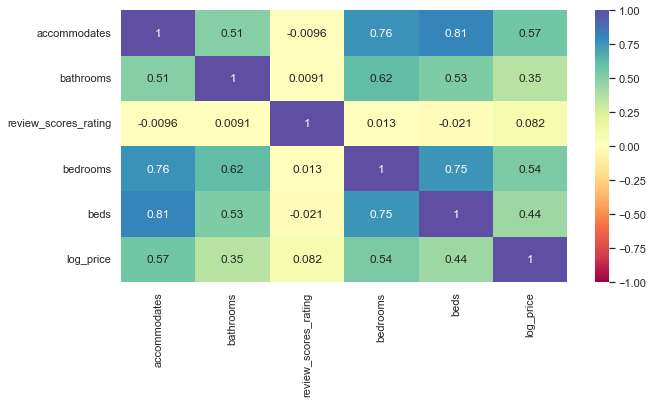

<IPython.core.display.Javascript object>

In [888]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

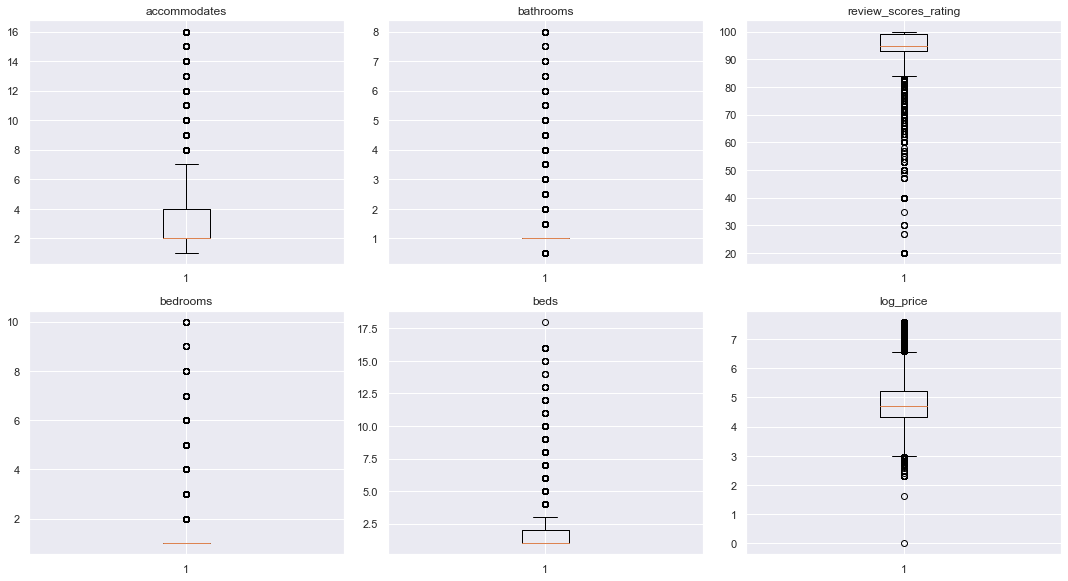

<IPython.core.display.Javascript object>

In [889]:
numeric_columns = [
    "accommodates",
    "bathrooms",
    "review_scores_rating",
    "bedrooms",
    "beds",
    "log_price",
]

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Let's find the percentage of outliers, in each column of the data, using IQR.**

**Treating outliers**

We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using  **Q1 - 1.5*IQR** and **Q3 + 1.5*IQR**, respectively.

**Note**: Generally, a value of 1.5 * IQR is taken to cap the values of outliers to upper and lower whiskers but any number (example 0.5, 2, 3, etc) other than 1.5 can be chosen. The value depends upon the business problem statement.

In [890]:
# Finding the 25th percentile and 75th percentile for the numerical columns.
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [891]:
# Percentage of outliers in each column
(
    (df[numeric_columns] < lower_whisker) | (df[numeric_columns] > upper_whisker)
).sum() / df.shape[0] * 100

accommodates             4.863829
bathrooms               21.070744
review_scores_rating     6.236336
bedrooms                23.644363
beds                     7.673621
log_price                2.067532
dtype: float64

<IPython.core.display.Javascript object>

In [892]:
Q1 = df["review_scores_rating"].quantile(0.25)  # 25th quantile
Q3 = df["review_scores_rating"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
print(lower_whisker)
print(upper_whisker)

84.0
108.0


<IPython.core.display.Javascript object>

In [893]:
df.loc[df["review_scores_rating"] > 108.0].sort_values(
    "review_scores_rating", ascending=False
)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price


<IPython.core.display.Javascript object>

In [894]:
df.loc[df["review_scores_rating"] < 84.0].sort_values(
    "review_scores_rating", ascending=False
)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
48512,Entire home/apt,4,1.0,strict,True,t,83.0,2,2,4.859812
24681,Entire home/apt,2,1.0,strict,True,f,83.0,1,2,4.753590
12009,Entire home/apt,5,1.0,moderate,True,t,83.0,1,2,4.812184
58592,Entire home/apt,2,1.0,flexible,True,f,83.0,1,2,3.806662
28854,Private room,2,1.0,strict,True,f,83.0,1,1,3.688879
...,...,...,...,...,...,...,...,...,...,...
61411,Entire home/apt,2,1.0,moderate,True,f,20.0,1,1,4.382027
61471,Shared room,1,1.0,flexible,False,f,20.0,1,1,4.248495
9601,Private room,1,1.0,flexible,True,t,20.0,1,1,4.248495
61682,Private room,2,1.0,moderate,False,f,20.0,1,1,4.382027


<IPython.core.display.Javascript object>

**As the outliers of this data set are looking valid and continuous, we don't need to necessarily treat the outliers. Removing the proper values will also impact the analysis.But above method shows the ways of removing outliers if incase we find any**

<AxesSubplot:xlabel='room_type', ylabel='log_price'>

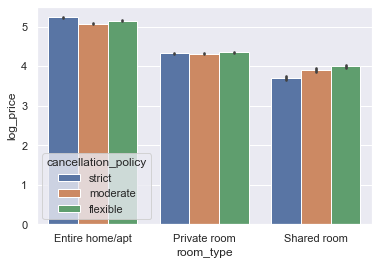

<IPython.core.display.Javascript object>

In [895]:
sns.barplot(data=df, x="room_type", y="log_price", hue="cancellation_policy")

<AxesSubplot:xlabel='room_type', ylabel='log_price'>

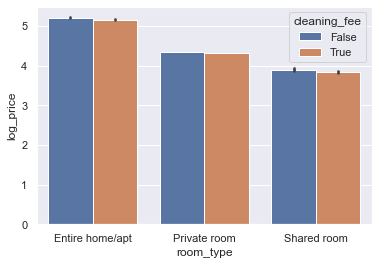

<IPython.core.display.Javascript object>

In [896]:
sns.barplot(data=df, x="room_type", y="log_price", hue="cleaning_fee")

<AxesSubplot:xlabel='room_type', ylabel='log_price'>

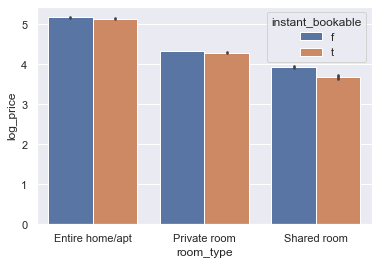

<IPython.core.display.Javascript object>

In [897]:
sns.barplot(data=df, x="room_type", y="log_price", hue="instant_bookable")

In [898]:
df.sort_values(by=["log_price"], ascending=True).head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
11627,Shared room,1,1.0,strict,True,t,87.000000,1,1,0.000000
3893,Entire home/apt,2,1.0,flexible,True,t,100.000000,1,1,1.609438
21277,Shared room,2,1.0,strict,True,t,100.000000,1,2,2.302585
4461,Private room,1,1.0,flexible,False,f,93.670997,1,1,2.302585
27016,Entire home/apt,5,1.0,flexible,False,f,94.110681,1,4,2.302585


<IPython.core.display.Javascript object>

In [899]:
df.drop(11627, inplace=True)

<IPython.core.display.Javascript object>

In [900]:
df.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

- Room_type and log_price dependencies on all the other categorical features are illustrated in the above graphs.

- log_price '0' is not a valid data, so the row can be removed.

- Now our data looks very clean and ready for modeling. 

## Model Building

1. We want to effectively predict the price of Airbnb accommodation. As `log_Price` is normally distributed variable, we will try to build a model with this.
2. Before we proceed to build a model, we'll have to encode categorical features.
3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.
4. We will build a Linear Regression model using the train data and then check it's performance.

### Define dependent variable

In [901]:
X = df.drop(["log_price"], axis=1)
y = df["log_price"]

<IPython.core.display.Javascript object>

### Creating dummy variables

In [902]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
0,3,1.0,100.000000,1,1,0,0,0,1,1,0
1,7,1.0,93.000000,3,3,0,0,0,1,1,1
2,5,1.0,92.000000,1,3,0,0,1,0,1,1
3,4,1.0,94.732024,2,2,0,0,0,0,1,0
4,2,1.0,40.000000,1,1,0,0,1,0,1,1


<IPython.core.display.Javascript object>

### Split the data into train and test

In [903]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [904]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 51867
Number of rows in test data = 22230


<IPython.core.display.Javascript object>

### Fitting a linear model

In [905]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

### Model Performance Check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [906]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [907]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.496708,0.377045,0.517862,0.517759,7.996024


<IPython.core.display.Javascript object>

* Both the R-squared and Adjusted R squared of our model are moderate. This indicates that we have been able to create a model that is able to explain variance in the price of accomadation up to 52%.

* Let's do a quick performance check on the test data.

In [908]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.503271,0.379984,0.513454,0.513213,8.045447


<IPython.core.display.Javascript object>

* Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) of train and test data are close, which indicates that our model is not overfitting the train data.

* MAE indicates that our current model is able to predict rental room prices within a mean error of 0.5 log_price on test data.

* MAPE of 8.05 on the test data indicates that the model can predict within ~8% of the AirBnb rental room prices.

## Observations

1. With our linear regression model, we have been able to capture ~52% of the variation in the data.

2. MAE indicates that our current model is able to predict room rental prices within a mean error of approx. 0.38 log_price on the test data, and the MAPE indicates that the model can predict within ~8% of the rental price.

3. Sometimes Regression models with low R-squared values can be perfectly good models for several reasons.

4. If we have a low R-squared value but the independent variables are statistically significant, we can still draw important conclusions about the relationships between the variables. 

## Conclusion
 
 
### Insights

1. From the analysis, factors like the review_rating, accommodates, bedrooms tend to increase the price of the rental rooms 

2. Factors like bathrooms and beds are having some relationship with the price of the Airbnb rental rooms.

3. Also room_type and cancellation_policy have much impact on the prices whereas its not much depend on cleaning_fee.

4. Bad reviews have some impact, and also instant_bookable are little hight priced. 

5. Room Type home/apt is preferred by many travelers, also the private rooms compared to the shared rooms. 


### Recommendations


* Room Type Entire home/apt have more strict/moderate cancellation policies. Making it flexible will definitely increase the number of custormers.

* Shared room is preferred by very less people. Some offers can be introduced for college students to increase the booking. 

* To help the host, the cleaning fee and instant booking can be made little strict as its not having much effect on pricing or booking of the property. 

* The number of beds can also be made little flexible with some latest availabilities to help guests/travelers.

* Business can also include the details like number of nights, space of the property, Amenities included etc for more efficient price predictions. 

* In future other machine learning model can also be used for prediction, which will give more ideas.  